## Clustering (Agrupamiento)

**Clustering** es una técnica que tiene como objetivo organizar patrones en grupos, de modo que los patrones que pertenecen al mismo grupo son lo suficientemente similares como para inferir que son del mismo tipo y los patrones que pertenecen a diferentes grupos son lo suficientemente diferentes como para inferir que son de otra clase.

**Clustering se realiza a través de un aprendizaje no supervisado, es decir, no sabes si el agrupamiento es el correcto.**

Existen varios tipos de algoritmos de clustering:
- **K-Means**
- **K-Median**
- **Heriachical Clustering**
- **DBSCAN**

Algunas aplicaciones de clustering:
- **Retail/ Marketing**:
    - Identificar patrones de compra de los consumidores.
    - Recomendar nuevos libros o películas a nuevos clientes.
- **Banca**:
    - Detección de fraude en el uso de tarjetas de crédito.
    - Identificar grupos de tipo de consumidores.
- **Seguros**:
    - Detección de fraude en reclamos.
    - Riesgo de seguro de los clientes.
- **Publicaciones científicas**:
    - Categorizar nuevos artículos basado en su contenido.
- **Medicina**:
    - Caracterizar pacientes a través de su comportamiento
- **Biología**:
    - Agrupación de marcadores genéticos para identificar familias.

## K-Means

**K-Means** es un algoritmo de aprendizaje no supervisado que tiene como objetivo **agrupar las observaciones en un conjunto de datos** dado en grupos. **El número de clusters es decidido arbitrariamente por el usuario** y el algoritmo forma los clusters **minimizando la suma de la distancia de los puntos desde sus respectivos centroides de cluster**.

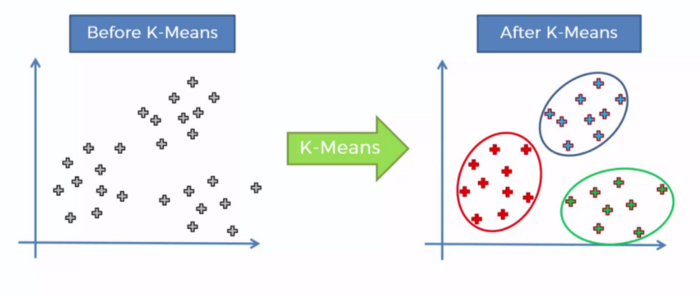

In [1]:
import numpy as np
import pandas as pd

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn # Para ver la versión

from sklearn import datasets

# Escalado
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")
print(f"scikit-learn=={sklearn.__version__}")

numpy==1.20.3
pandas==1.2.4
matplotlib==3.4.2
seaborn==0.11.1
scikit-learn==1.5.1


In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
X.shape

(150, 4)

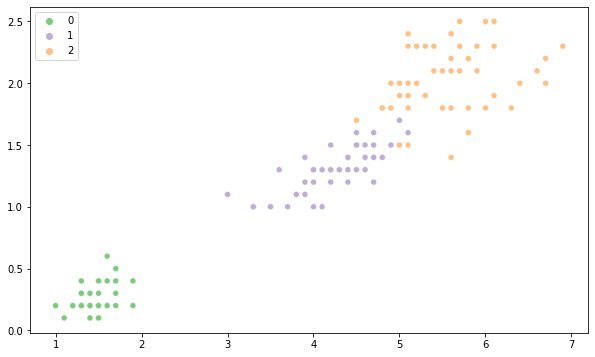

In [5]:
plt.figure(figsize = (10, 6))

# Datos Originales
sns.scatterplot(x = X[:, 2], y = X[:, 3], hue = y, palette = "Accent")
plt.show()

In [ ]:
# Escalado de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

### Clustering

In [7]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(n_clusters=3)

### Etiquetas

In [13]:
# .labels_ nos retorna la "prediccion" del modelo de clustering
# El número de valores únicos está definido por n_clusters

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

### Centro de los Clusters

In [15]:
# .cluster_centers_ retorna el centros de los clusters
# Tiene tantas dimensiones como columnas tiene X

kmeans.cluster_centers_

array([[0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

### Inercia

In [17]:
# .inertia_ retorna la inercia del modelo
# La inercia del modelo es la distancia de cada punto con el centro de los clusters.
# Mientras mayor sea la inercia más distancia hay entre centros de clusters y los puntos

kmeans.inertia_

6.982216473785234

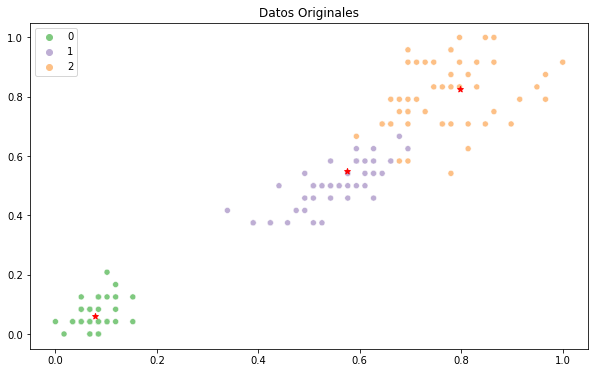

In [18]:
# Datos Originales

plt.figure(figsize = (10, 6))

# Datos Originales con etiqueta real
sns.scatterplot(x = X[:, 2], y = X[:, 3], hue = y, palette = "Accent")

# Centros de los Clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], color = "red", marker = "*")

plt.title("Datos Originales")
plt.show()

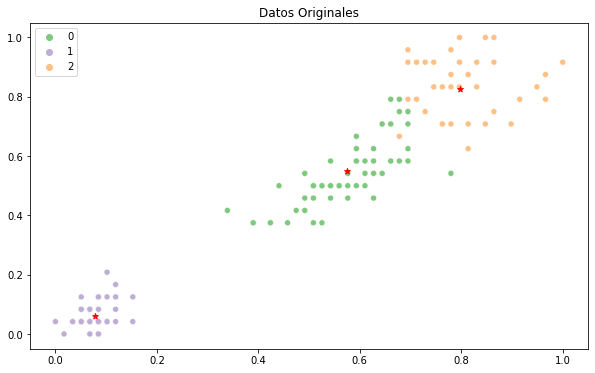

In [21]:
# Datos Originales

plt.figure(figsize = (10, 6))

# Datos Originales con etiqueta real
sns.scatterplot(x = X[:, 2], y = X[:, 3], hue = kmeans.labels_, palette = "Accent")

# Centros de los Clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], color = "red", marker = "*")

plt.title("Datos Originales")
plt.show()

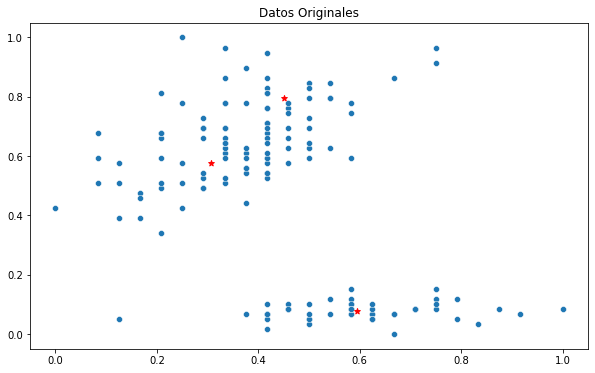

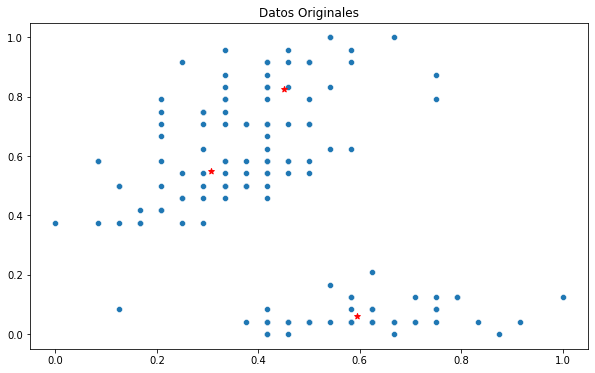

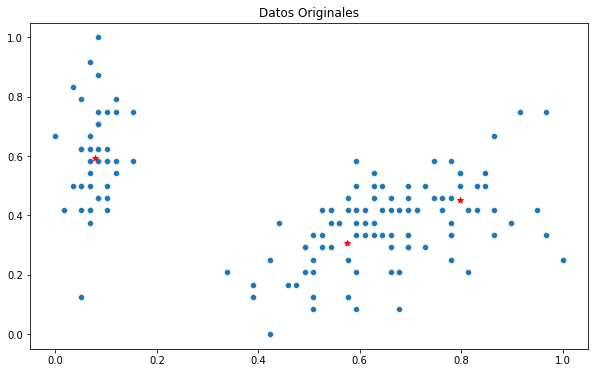

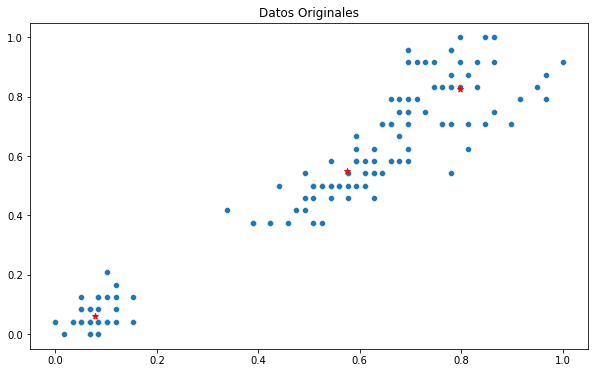

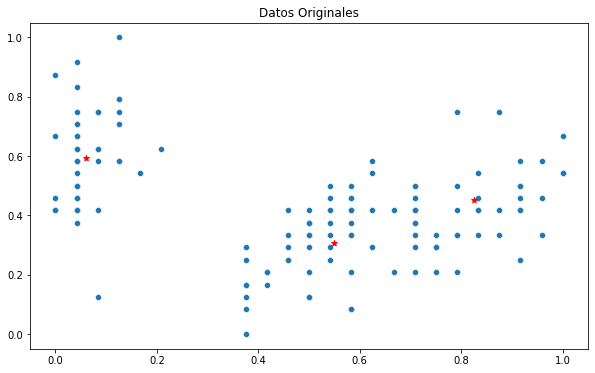

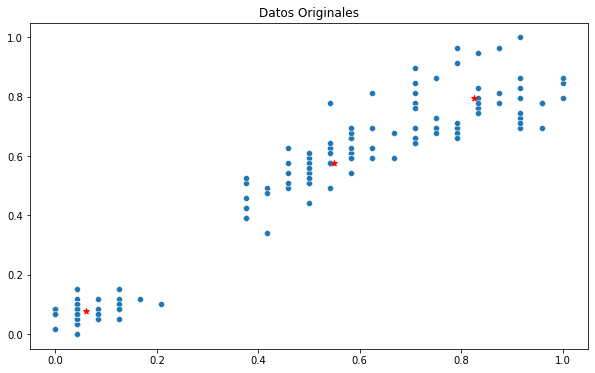

In [19]:
# Datos Originales

for i in range(1, 4):
    for j in range(1, 4):
        
        if i != j:
            plt.figure(figsize = (10, 6))

            # Datos Originales con etiqueta real
            sns.scatterplot(x = X[:, i], y = X[:, j], palette = "Accent")

            # Centros de los Clusters
            plt.scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, j], color = "red", marker = "*")

            plt.title("Datos Originales")
            plt.show()

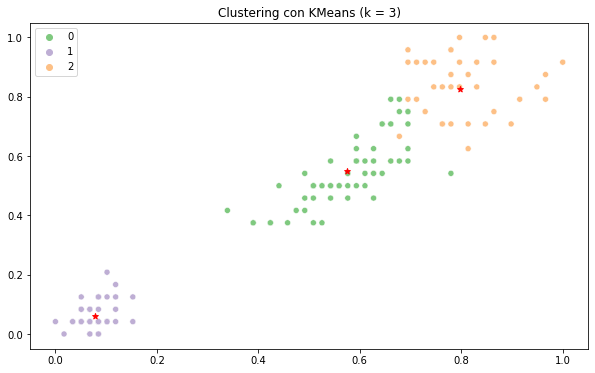

In [22]:
# Clustering con KMeans (k = 3)

plt.figure(figsize = (10, 6))

# Datos Originales con etiquetas dadas por el cluster
sns.scatterplot(x = X[:, 2], y = X[:, 3], hue = kmeans.labels_, palette = "Accent")

# Centros de los Clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], color = "red", marker = "*")

plt.title("Clustering con KMeans (k = 3)")
plt.show()

In [ ]:
df_cluster = pd.DataFrame()

df_cluster["y_real"] = y
df_cluster["cluster"] = kmeans.labels_

# El modelo "cambio" el orden de las etiquetas, con esta linea cambio al orden correcto
# df_cluster["cluster"] = df_cluster["cluster"].map({0 : 0, 1 : 2, 2 : 1})

df_cluster["resultado"] = [False if y == c else True for y, c in zip(df_cluster["y_real"], df_cluster["cluster"])]

df_cluster

In [ ]:
df_cluster["resultado"].value_counts()

### Elbow Method (Método del Codo)

En clustering, el método del codo es un algoritmo utilizado para determinar el número de clusters "optimo" en un conjunto de datos. El método consiste en trazar la variación explicada (inercia) en función del número de clusters y elegir el codo de la curva como el número de clusters a utilizar.

In [23]:
inercias = list() 
  
for k in range(1, 11): 
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)    
    
    inercias.append(kmeans.inertia_) 
    
inercias

[41.16611042137328,
 12.127790750538193,
 7.122750172943849,
 5.525760232040968,
 4.987566309723792,
 3.9624980178394473,
 3.588624973998135,
 3.4240220986557617,
 2.862322168197405,
 2.7648132132872054]

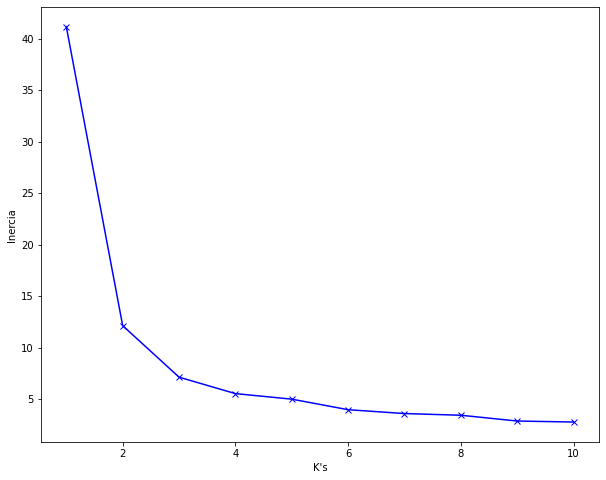

In [24]:
plt.figure(figsize = (10, 8))

plt.plot(range(1, len(inercias) + 1), inercias, marker = "x", color = "blue")

plt.xlabel("K's") 
plt.ylabel("Inercia") 

plt.show()

In [25]:
################################################################################################################################

### Ejemplo: Segmentación de Mercado

In [26]:
df = pd.read_csv("../Data/market_segmetation.csv")

df

,Id,Balance,CantidadComprasRealizadas,CompraMasAltaRealizada,CompraMasAltaRealizadaPlazos,FrecuenciadeCompra,FrecuenciadeCompraPlazos,LimiteCredito,Pagos,PagoMinimo,Anualidad
0,C10001,40.900749,95.40,0.00,95.40,0.166667,0.083333,1000.0,201.802084,139.509787,12
1,C10002,3202.467416,0.00,0.00,0.00,0.000000,0.000000,7000.0,4103.032597,1072.340217,12
2,C10003,2495.148862,773.17,773.17,0.00,1.000000,0.000000,7500.0,622.066742,627.284787,12
3,C10005,817.714335,16.00,16.00,0.00,0.083333,0.000000,1200.0,678.334763,244.791237,12
4,C10006,1809.828751,1333.28,0.00,1333.28,0.666667,0.583333,1800.0,1400.057770,2407.246035,12
...,...,...,...,...,...,...,...,...,...,...,...
8631,C19184,5.871712,20.90,20.90,0.00,0.166667,0.000000,500.0,58.644883,43.473717,6
8632,C19186,28.493517,291.12,0.00,291.12,1.000000,0.833333,1000.0,325.594462,48.886365,6
8633,C19188,23.398673,144.40,0.00,144.40,0.833333,0.666667,1000.0,81.270775,82.418369,6
8634,C19189,13.457564,0.00,0.00,0.00,0.000000,0.000000,500.0,52.549959,55.755628,6


### Descripción de cada columna

- **Id**: Identificación del cliente.
- **Balance**: Cantidad de saldo disponible en la cuenta del cliente.
- **CantidadComprasRealizas**: Cantidad de compras realizadas por el cliente.
- **CompraMasAltaRealizada**: Compra más alta realizada por el cliente .
- **CompraMasAltaRealizadaPlazos** Compra más alta realizada a plazos por el cliente.
- **FrecuenciadeCompra**: Frecuencia de compra del cliente (0 si es baja, 1 si es alta).
- **FrecuenciadeCompraPlazos**: Frecuencia de compra a plazos del cliente (0 si es baja, 1 si es alta).
- **LimiteCredito**: Limite de credito del cliente.
- **Pagos**: Pagos realizados por el cliente.
- **PagoMinimo**: Pagos minimos realizados por el cliente.
- **Anualidad**: Anualidad de la tarjeta de credito. 

In [27]:
# Eliminamos el "Id"

df.drop("Id", axis = 1, inplace = True)

In [28]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.3226588898711564

In [41]:
# Escalado de datos

X = np.asarray(df)
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

# Método del codo
inercias = list()

sil_score = list()
  
for k in range(2, 11):
    print(k)
    
    kmeans = KMeans(k)
    kmeans.fit(X)   
    
    inercias.append(kmeans.inertia_)
    sil_score.append(silhouette_score(X, kmeans.labels_))
    
inercias

2
3
4
5
6
7
8
9
10


[1362.0066088257086,
 1013.9618278989898,
 803.2956657830525,
 792.4814337417913,
 582.5247923951863,
 527.2851664514299,
 479.3525770921108,
 439.7065194135823,
 396.0440966101423]

In [42]:
len(X)

8636

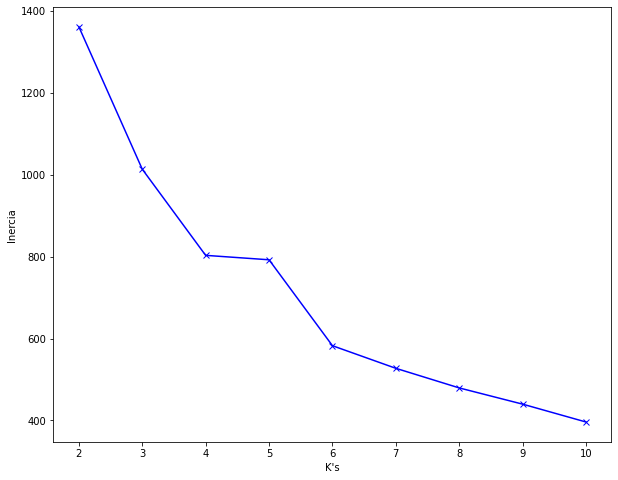

In [45]:
plt.figure(figsize = (10, 8))

plt.plot(range(2, len(inercias) + 2), inercias, marker = "x", color = "blue")

plt.xlabel("K's") 
plt.ylabel("Inercia") 

plt.show()

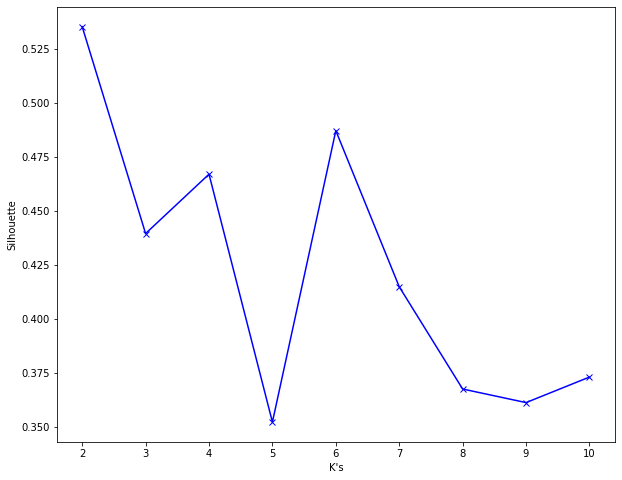

In [46]:
plt.figure(figsize = (10, 8))

plt.plot(range(2, len(sil_score) + 2), sil_score, marker = "x", color = "blue")

plt.xlabel("K's") 
plt.ylabel("Silhouette") 

plt.show()

In [47]:
# Cluster

kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

kmeans.labels_

array([0, 0, 2, ..., 3, 3, 3], dtype=int32)

In [48]:
# Centros de los Cluster

kmeans.cluster_centers_

array([[9.82113130e-02, 4.64701423e-03, 5.09429854e-03, 9.03799720e-04,
        8.80958330e-02, 1.96854278e-02, 1.39339481e-01, 3.21751686e-02,
        1.20836137e-02, 9.78220529e-01],
       [7.73114705e-02, 3.98085177e-02, 2.27452959e-02, 4.55777012e-02,
        9.45361664e-01, 8.84342443e-01, 1.59213875e-01, 4.25924262e-02,
        1.26537256e-02, 9.35616761e-01],
       [7.21961932e-02, 2.53823018e-02, 2.24202847e-02, 1.47311464e-02,
        6.27038766e-01, 2.99391761e-01, 1.63326613e-01, 3.37815733e-02,
        9.34494745e-03, 9.80042017e-01],
       [7.09390470e-02, 7.50672552e-03, 7.53480499e-03, 2.71104540e-03,
        2.29237949e-01, 8.92123799e-02, 1.06944383e-01, 1.86181276e-02,
        5.78757949e-03, 2.28952772e-01]])

In [49]:
df_centroides  = pd.DataFrame(data = kmeans.cluster_centers_, columns = df.columns)
df_centroides

,Balance,CantidadComprasRealizadas,CompraMasAltaRealizada,CompraMasAltaRealizadaPlazos,FrecuenciadeCompra,FrecuenciadeCompraPlazos,LimiteCredito,Pagos,PagoMinimo,Anualidad
0,0.098211,0.004647,0.005094,0.000904,0.088096,0.019685,0.139339,0.032175,0.012084,0.978221
1,0.077311,0.039809,0.022745,0.045578,0.945362,0.884342,0.159214,0.042592,0.012654,0.935617
2,0.072196,0.025382,0.022420,0.014731,0.627039,0.299392,0.163327,0.033782,0.009345,0.980042
3,0.070939,0.007507,0.007535,0.002711,0.229238,0.089212,0.106944,0.018618,0.005788,0.228953


In [50]:
# Vamos a regresar los valores escalados a los valores reales

df_centroides = x_scaler.inverse_transform(df_centroides)

df_centroides =  pd.DataFrame(data = df_centroides, columns = [df.columns])
df_centroides

,Balance,CantidadComprasRealizadas,CompraMasAltaRealizada,CompraMasAltaRealizadaPlazos,FrecuenciadeCompra,FrecuenciadeCompraPlazos,LimiteCredito,Pagos,PagoMinimo,Anualidad
0,1870.251641,227.887580,207.649977,20.335494,0.088096,0.019685,4223.217466,1632.020200,923.282030,11.869323
1,1472.253044,1952.192592,927.126691,1025.498277,0.945362,0.884342,4818.455566,2160.398440,966.842108,11.613701
2,1374.842110,1244.737164,913.878829,331.450793,0.627039,0.299392,4941.632051,1713.499349,714.030978,11.880252
3,1350.902100,368.126591,307.128070,60.998522,0.229238,0.089212,3252.984257,944.387638,442.226052,7.373717


### ¿Qué observamos en la tabla anterior? 

__Las etiquetas de los clusters pueden variar.__

- Cluster 0, los clientes suelen tener una frecuencia de compra muy baja, no realizan compras con un alto valor y a la vez mantienen un balance alto.


- Cluster 1, los clientes tienen un balance promedio, suelen hacer compras con alto valor, son clientes recurrentes debido a que tienen la frecuencia más alta de compra tanto de un solo pago como a plazos. 


- Cluster 3, los clientes con mayor limite de credito y un comportamiento similar al cluster 1.


- En el Cluster 2 los clientes se diferencian por un limite de credito bajo y anualidad baja.

In [51]:
df["cluster"] = kmeans.labels_

df

,Balance,CantidadComprasRealizadas,CompraMasAltaRealizada,CompraMasAltaRealizadaPlazos,FrecuenciadeCompra,FrecuenciadeCompraPlazos,LimiteCredito,Pagos,PagoMinimo,Anualidad,cluster
0,40.900749,95.40,0.00,95.40,0.166667,0.083333,1000.0,201.802084,139.509787,12,0
1,3202.467416,0.00,0.00,0.00,0.000000,0.000000,7000.0,4103.032597,1072.340217,12,0
2,2495.148862,773.17,773.17,0.00,1.000000,0.000000,7500.0,622.066742,627.284787,12,2
3,817.714335,16.00,16.00,0.00,0.083333,0.000000,1200.0,678.334763,244.791237,12,0
4,1809.828751,1333.28,0.00,1333.28,0.666667,0.583333,1800.0,1400.057770,2407.246035,12,2
...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,20.90,20.90,0.00,0.166667,0.000000,500.0,58.644883,43.473717,6,3
8632,28.493517,291.12,0.00,291.12,1.000000,0.833333,1000.0,325.594462,48.886365,6,1
8633,23.398673,144.40,0.00,144.40,0.833333,0.666667,1000.0,81.270775,82.418369,6,3
8634,13.457564,0.00,0.00,0.00,0.000000,0.000000,500.0,52.549959,55.755628,6,3


In [58]:
clusters_df = pd.get_dummies(df['cluster'], prefix = "cluster_")

In [60]:
df_merged = pd.concat([df, clusters_df], axis = 1)

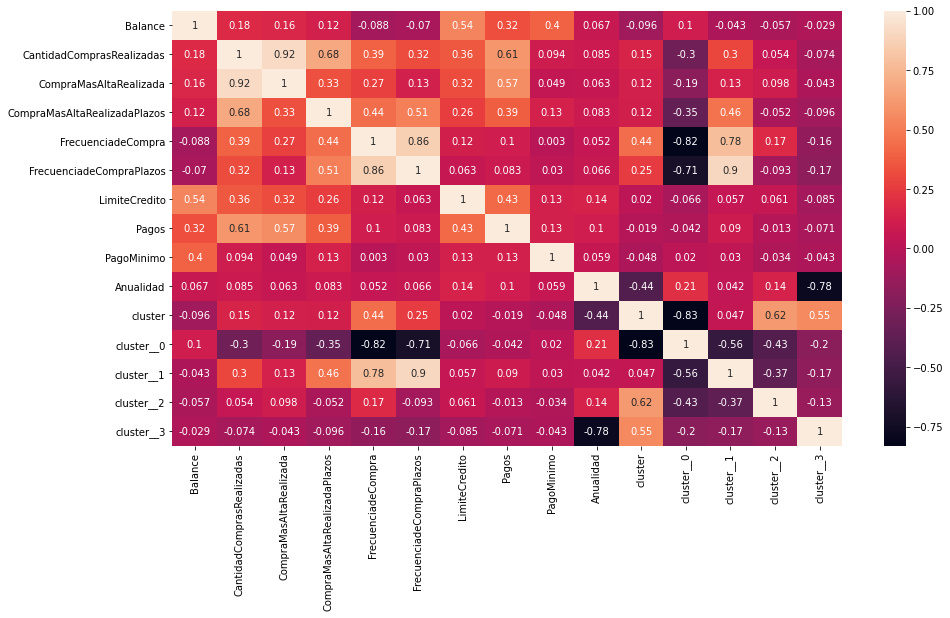

In [61]:
plt.figure(figsize = (15, 8))

sns.heatmap(df_merged.corr(), annot = True)
plt.show()

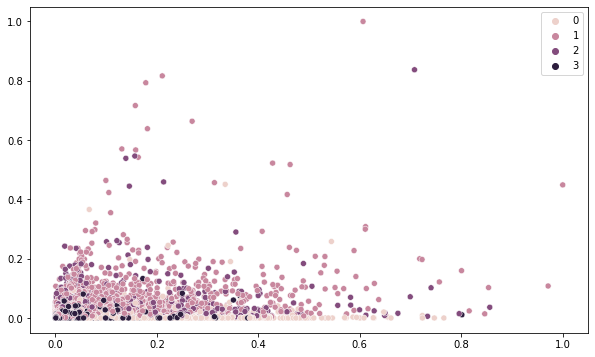

In [53]:
plt.figure(figsize = (10, 6))

# Datos Originales
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = kmeans.labels_)
plt.show()

In [ ]:
################################################################################################################################